In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [58]:
weather = pd.read_csv('weatherAUS5000.csv') 
weather.head()
#(5000, 22)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015/3/24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011/7/12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010/2/8,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016/9/19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014/3/5,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


In [59]:
X = weather.iloc[:,:-1]#(5000, 21)
y = weather.iloc[:,-1]#(5000, 1)

In [4]:
#X.info()
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [60]:
#重置index
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in [Xtrain,Xtest,ytrain,ytest]:
    i.index = range(i.shape[0])

In [61]:
#样本是否不均衡
ytrain.value_counts()
#No     2704
#Yes     796
ytest.value_counts()
#No     1157
#Yes     343

No     1157
Yes     343
Name: RainTomorrow, dtype: int64

In [62]:
#将y标签化
# yes == 1  
# no == 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(ytrain)
ytrain = pd.DataFrame(encoder.transform(ytrain))
ytest = pd.DataFrame(encoder.transform(ytest))


In [63]:
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


In [64]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


In [65]:
Xtrain.shape#(3500, 21)
Xtest.shape#(1500, 21)

(1500, 21)

In [66]:
Xtrain.loc[Xtrain.loc[:,'Rainfall'] > 60,'Rainfall'].value_counts().count()

10

In [67]:
#Xtrain.loc[Xtrain.loc[:,'Cloud9am'] == 9,'Cloud9am']
Xtrain.loc[Xtrain.loc[:,'Rainfall'] == 115.8,'Rainfall']#2857
Xtrain.loc[Xtrain.loc[:,'Evaporation'] == 56,'Evaporation']#1763
Xtrain.loc[Xtrain.loc[:,'WindSpeed9am'] == 65,'WindSpeed9am']#591
Xtrain.loc[Xtrain.loc[:,'WindGustSpeed'] == 117,'WindGustSpeed']#640
Xtrain.loc[Xtrain.loc[:,'WindSpeed3pm'] == 65,'WindSpeed3pm']#1717

1717    65.0
Name: WindSpeed3pm, dtype: float64

In [68]:
Xtrain = Xtrain.drop(index=[2857,1763,591,640,1717])
ytrain = ytrain.drop(index=[2857,1763,591,640,1717])

In [69]:
Xtest.loc[Xtest.loc[:,'Rainfall'] == 108.2,'Rainfall']#624
Xtest.loc[Xtest.loc[:,'Evaporation'] == 38.8,'Evaporation']#330
Xtest.loc[Xtest.loc[:,'WindSpeed9am'] == 72,'WindSpeed9am']#624
Xtest.loc[Xtest.loc[:,'WindGustSpeed'] == 122,'WindGustSpeed']#821
#Xtest.loc[Xtest.loc[:,'WindSpeed3pm'] == 56,'WindSpeed3pm']

821    122.0
Name: WindGustSpeed, dtype: float64

In [70]:
Xtest = Xtest.drop(index=[624,330,821])
ytest = ytest.drop(index=[624,330,821])

In [71]:
Xtrain.shape#(3495, 21)
ytrain.shape#(3495, 1)
Xtest.shape#(1497, 21)
ytest.shape#(1497, 1)

(1497, 1)

In [72]:
for i in [Xtrain,Xtest,ytrain,ytest]:
    i.index = range(i.shape[0])

In [73]:
Xtrain.head()
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016/1/23,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,2.0,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1
1,2009/3/5,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5
2,2010/3/5,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013/10/26,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,15.0,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6
4,2016/11/28,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,7.0,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0


In [46]:
Xtrainc = Xtrain.copy()
Xtrainc.sort_values(by='Location')
Xtrainc.iloc[:,0].value_counts().count()

2137

In [82]:
#提取月份
Xtrain['Date'] = Xtrain["Date"].apply(lambda x:int(x.split("/")[1]))

KeyError: 'Date'

In [84]:
Xtest['Date'] = Xtest["Date"].apply(lambda x:int(x.split("/")[1]))

In [90]:
Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan
Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

In [91]:
Xtrain.head()
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [87]:
cityll = pd.read_csv('cityll.csv')
city_climate = pd.read_csv('Cityclimate.csv')

In [96]:
cityll.head()

,Unnamed: 0,City,Latitude,Longitude,Latitudedir,Longitudedir,Latitudenum,Longitudenum
0,0,Adelaide,34.9285°,138.6007°,"S,",E,34.9285,138.6007
1,1,Albany,35.0275°,117.8840°,"S,",E,35.0275,117.8840
2,2,Albury,36.0737°,146.9135°,"S,",E,36.0737,146.9135
3,3,Wodonga,36.1241°,146.8818°,"S,",E,36.1241,146.8818
4,4,AliceSprings,23.6980°,133.8807°,"S,",E,23.6980,133.8807


In [89]:
city_climate.head()

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


In [95]:
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x:float(x[:-1]))
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x:float(x[:-1]))

SyntaxError: invalid syntax (<ipython-input-95-170de9c651f4>, line 3)

In [98]:
cityll = cityll.iloc[:,[1,6,7]]

In [110]:
cityll["climate"] = city_climate.iloc[:,-1]
citylld = cityll.copy()

In [113]:
citylld.head()

,City,Latitudenum,Longitudenum,climate,slat,slon
0,Adelaide,34.9285,138.6007,Warm temperate,0.609617,2.419039
1,Albany,35.0275,117.8840,Mild temperate,0.611345,2.057464
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter",0.629605,2.564124
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter",0.630484,2.563571
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter",0.413608,2.336659


In [102]:
samplecity = pd.read_csv('samplecity.csv')

In [104]:
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))
samplecityd = samplecity.iloc[:,[1,6,7]]

In [111]:
#首先使用radians将角度转换成弧度
from math import radians, sin, cos, acos
citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

/jxy8/jxy/.local/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/jxy8/jxy/.local/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [112]:
import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) + 
                          np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    #每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]

/jxy8/jxy/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  


In [115]:
samplecityd.head()
samplecityd["climate"].value_counts()

Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

In [121]:
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.columns = ["Location","Climate"]
locafinal = locafinal.set_index(keys="Location")
locafinal

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate
Brisbane,"Warm humid summer, mild winter"
Adelaide,Warm temperate
Bendigo,Cool temperate
Townsville,"High humidity summer, warm winter"


In [122]:
locafinal.to_csv('samplelocation.csv')

In [123]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [126]:
import re
Xtrain["Location"] = Xtrain["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

In [127]:
Xtrain = Xtrain.rename(columns={"Location":"Climate"})
Xtest = Xtest.rename(columns={"Location":"Climate"})

In [139]:
Xtrain.head()
Xtest.head()

,Date,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,Cool temperate,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,7.0,7.0,26.2,23.1,Yes
1,3,Mild temperate,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,Cool temperate,9.1,13.3,NaN,NaN,NaN,NE,41.0,N,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,No
3,10,Warm temperate,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,7.0,7.0,16.8,19.6,No
4,11,Mild temperate,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


# 处理缺失值

使用训练集上的众数对训练集和测试集都进行填补。

In [130]:
Xtrain.isnull().mean()


Month            0.000000
Climate          0.000000
MinTemp          0.004006
MaxTemp          0.003147
Rainfall         0.009442
Evaporation      0.434049
Sunshine         0.488984
WindGustDir      0.067811
WindGustSpeed    0.067811
WindDir9am       0.067525
WindDir3pm       0.024320
WindSpeed9am     0.009728
WindSpeed3pm     0.018026
Humidity9am      0.011731
Humidity3pm      0.026323
Pressure9am      0.098999
Pressure3pm      0.098999
Cloud9am         0.380258
Cloud3pm         0.402003
Temp9am          0.005436
Temp3pm          0.019742
RainToday        0.009442
dtype: float64

In [133]:
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud

In [134]:
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [136]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
si.fit(Xtrain.loc[:,cate])
#使用train拟合，就代表了利用Xtrain的众数进行填补

IndexingError: slice(None, ['Climate', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Cloud9am', 'Cloud3pm'], None)

In [138]:
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [141]:
Xtrain.loc[:,cate].isnull().mean()
Xtest.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [143]:
Xtrain.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,1.0,2.0,6.0,0.0,0.0,0.0,7.0
1,0.0,6.0,4.0,6.0,0.0,7.0,7.0
2,4.0,13.0,4.0,0.0,0.0,1.0,3.0
3,4.0,8.0,3.0,8.0,0.0,6.0,6.0
4,2.0,5.0,0.0,6.0,0.0,2.0,4.0


In [142]:
#类别编码
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
oe = OrdinalEncoder()
oe = oe.fit(Xtrain.loc[:,cate])

Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

Xtrain.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,1.0,2.0,6.0,0.0,0.0,0.0,7.0
1,0.0,6.0,4.0,6.0,0.0,7.0,7.0
2,4.0,13.0,4.0,0.0,0.0,1.0,3.0
3,4.0,8.0,3.0,8.0,0.0,6.0,6.0
4,2.0,5.0,0.0,6.0,0.0,2.0,4.0


In [146]:
#连续型缺失值处理

col = Xtrain.columns.tolist()
for i in cate:
    col.remove(i)
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [153]:
Xtest = Xtest.rename(columns={"Date":"Month"})
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,0.0,22.0,27.8,25.2,NaN,NaN,11.0,57.0,8.0,...,37.0,91.0,86.0,1006.6,1008.1,7.0,7.0,26.2,23.1,1.0
1,3,4.0,12.0,18.6,2.2,3.0,7.8,12.0,52.0,12.0,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,1.0
2,3,0.0,9.1,13.3,NaN,NaN,NaN,4.0,41.0,3.0,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,0.0
3,10,6.0,13.1,20.3,0.0,NaN,NaN,12.0,33.0,13.0,...,24.0,40.0,51.0,1021.3,1019.5,7.0,7.0,16.8,19.6,0.0
4,11,4.0,12.2,20.0,0.4,NaN,NaN,0.0,33.0,12.0,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,0.0


In [154]:
impmean = SimpleImputer(missing_values=np.nan,strategy='mean')
impmean = impmean.fit(Xtrain.loc[:,col])

Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,17.5,36.0,0.0,8.80000,7.516573,2.0,26.000000,6.0,...,15.0,57.0,51.658243,1016.8,1012.2,0.0,7.0,27.5,21.712259,0.0
1,12.0,0.0,9.5,25.0,0.0,5.58635,7.516573,6.0,33.000000,4.0,...,17.0,59.0,31.000000,1020.4,1017.5,7.0,7.0,14.6,23.600000,0.0
2,4.0,4.0,13.0,22.6,0.0,3.80000,10.400000,13.0,39.792511,4.0,...,31.0,79.0,68.000000,1020.3,1015.7,1.0,3.0,17.5,20.800000,0.0
3,11.0,4.0,13.9,29.8,0.0,5.80000,5.100000,8.0,37.000000,3.0,...,28.0,82.0,44.000000,1012.5,1005.9,6.0,6.0,18.5,27.500000,0.0
4,4.0,2.0,6.0,23.5,0.0,2.80000,8.600000,5.0,24.000000,0.0,...,15.0,58.0,35.000000,1019.8,1014.1,2.0,4.0,12.4,22.400000,0.0


In [158]:
#连续变量无量纲化
#col.remove("Month")
col
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,0.827867,1.774795,-0.319798,1.008784e+00,0.000000,2.0,-1.091695,6.0,...,-0.415831,-0.646838,0.000000,-0.124365,-0.455957,0.0,7.0,1.612320,0.000000,0.0
1,12.0,0.0,-0.425712,0.244980,-0.319798,-2.788046e-16,0.000000,6.0,-0.537636,4.0,...,-0.180370,-0.539696,-1.012444,0.412721,0.338807,7.0,7.0,-0.365696,0.271186,0.0
2,4.0,4.0,0.122729,-0.088797,-0.319798,-5.607461e-01,1.060558,13.0,0.000000,4.0,...,1.467862,0.531724,0.800896,0.397802,0.068887,1.0,3.0,0.078974,-0.131052,0.0
3,11.0,4.0,0.263757,0.912536,-0.319798,6.706609e-02,-0.888844,8.0,-0.221031,3.0,...,1.114670,0.692437,-0.375324,-0.765884,-1.400676,6.0,6.0,0.232309,0.831445,0.0
4,4.0,2.0,-0.974153,0.036369,-0.319798,-8.746523e-01,0.398497,5.0,-1.249998,0.0,...,-0.415831,-0.593267,-0.816407,0.323207,-0.171042,2.0,4.0,-0.703032,0.098798,0.0


In [166]:
Xtrain.shape#(3495, 22)
Xtest.shape#(1497, 22)
ytrain.shape#(3495, 1)
ytest.shape#(1497, 1)
ytest.head()

,0
0,0
1,0
2,1
3,0
4,0


# 开始建模

In [172]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score

ytrain = ytrain.iloc[:,0].ravel()
ytest = ytest.iloc[:,0].ravel()

In [173]:
ytest

array([0, 0, 1, ..., 0, 1, 1])

## 基准

In [175]:
times = time()

for kernel in ['linear','poly','sigmoid','rbf']:
    clf = SVC(kernel=kernel,
             gamma='auto',
             degree = 1,
             cache_size=5000).fit(Xtrain,ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,ytest)
    recall = recall_score(ytest,result)
    auc = roc_auc_score(ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f,recall is %f, auc is %f" %
          (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.843687,recall is 0.469208, auc is 0.868456
00:01:159094
poly 's testing accuracy 0.840347,recall is 0.451613, auc is 0.867492
00:01:584497
sigmoid 's testing accuracy 0.653307,recall is 0.152493, auc is 0.435400
00:02:255758
rbf 's testing accuracy 0.814963,recall is 0.310850, auc is 0.814978
00:04:440382


## 调参

### 提升recall

In [176]:

# 关键在于平衡样本，即调整class_weight
times = time()

for kernel in ['linear','poly','sigmoid','rbf']:
    clf = SVC(kernel=kernel,
             gamma='auto',
             degree = 1,
             cache_size=5000,
             class_weight='balanced').fit(Xtrain,ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,ytest)
    recall = recall_score(ytest,result)
    auc = roc_auc_score(ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f,recall is %f, auc is %f" %
          (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.794923,recall is 0.774194, auc is 0.868763
00:01:452437
poly 's testing accuracy 0.792251,recall is 0.765396, auc is 0.870288
00:02:053544
sigmoid 's testing accuracy 0.562458,recall is 0.281525, auc is 0.435240
00:03:485727
rbf 's testing accuracy 0.804275,recall is 0.604106, auc is 0.820254
00:04:741828


In [177]:
#大幅提升class_weight的效果
times = time()

for kernel in ['linear','poly','sigmoid','rbf']:
    clf = SVC(kernel=kernel,
             gamma='auto',
             degree = 1,
             cache_size=5000,
             class_weight={1:10}).fit(Xtrain,ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,ytest)
    recall = recall_score(ytest,result)
    auc = roc_auc_score(ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f,recall is %f, auc is %f" %
          (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.641283,recall is 0.912023, auc is 0.865727
00:02:530841
poly 's testing accuracy 0.635939,recall is 0.912023, auc is 0.866166
00:03:431605
sigmoid 's testing accuracy 0.227789,recall is 1.000000, auc is 0.434687
00:04:892083
rbf 's testing accuracy 0.789579,recall is 0.551320, auc is 0.803788
00:06:146248


### 提高准确率

In [182]:
valuec = pd.Series(ytest).value_counts()
valuec
#0    1156
#1     341
valuec[0]/valuec.sum()#0.7722110888443554

0.7722110888443554

In [183]:
from sklearn.metrics import confusion_matrix
clf = SVC(kernel=kernel,
             gamma='auto',
             degree = 1,
             cache_size=5000).fit(Xtrain,ytrain)
result = clf.predict(Xtest)
cm = confusion_matrix(ytest,result,labels=[1,0])

In [186]:
specificity = cm[1,1]/cm[1,:].sum()
specificity

0.9636678200692042

In [188]:
irange = np.linspace(0.01,0.05,10)
for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}
             ).fit(Xtrain, ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.010000 testing accuracy 0.843687, recall is 0.472141', auc is 0.868380
00:01:161490
under ratio 1:1.014444 testing accuracy 0.844355, recall is 0.475073', auc is 0.868337
00:01:092594
under ratio 1:1.018889 testing accuracy 0.845023, recall is 0.480938', auc is 0.868355
00:01:142898
under ratio 1:1.023333 testing accuracy 0.845023, recall is 0.480938', auc is 0.868464
00:01:076473
under ratio 1:1.027778 testing accuracy 0.845023, recall is 0.483871', auc is 0.868844
00:01:102538
under ratio 1:1.032222 testing accuracy 0.844355, recall is 0.480938', auc is 0.868761
00:01:093941
under ratio 1:1.036667 testing accuracy 0.843687, recall is 0.478006', auc is 0.868707
00:01:097910
under ratio 1:1.041111 testing accuracy 0.844355, recall is 0.480938', auc is 0.868745
00:01:070395
under ratio 1:1.045556 testing accuracy 0.843687, recall is 0.480938', auc is 0.869047
00:01:087774
under ratio 1:1.050000 testing accuracy 0.843687, recall is 0.480938', auc is 0.869202
00:01:144487


In [189]:
irange = np.linspace(0.015,0.028,10)
for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
              ,gamma="auto"
              ,cache_size = 5000
              ,class_weight = {1:1+i}
             ).fit(Xtrain, ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,ytest)
    recall = recall_score(ytest, result)
    auc = roc_auc_score(ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.015000 testing accuracy 0.844355, recall is 0.475073', auc is 0.868352
00:01:144793
under ratio 1:1.016444 testing accuracy 0.843687, recall is 0.475073', auc is 0.868357
00:01:097514
under ratio 1:1.017889 testing accuracy 0.845023, recall is 0.480938', auc is 0.868383
00:01:038199
under ratio 1:1.019333 testing accuracy 0.845023, recall is 0.480938', auc is 0.868309
00:01:132069
under ratio 1:1.020778 testing accuracy 0.845023, recall is 0.480938', auc is 0.868360
00:01:091105
under ratio 1:1.022222 testing accuracy 0.845023, recall is 0.480938', auc is 0.868335
00:01:073705
under ratio 1:1.023667 testing accuracy 0.845023, recall is 0.480938', auc is 0.868406
00:01:055693
under ratio 1:1.025111 testing accuracy 0.845023, recall is 0.483871', auc is 0.868614
00:01:053329
under ratio 1:1.026556 testing accuracy 0.845023, recall is 0.483871', auc is 0.868855
00:01:131552
under ratio 1:1.028000 testing accuracy 0.845023, recall is 0.483871', auc is 0.868857
00:01:102288


### 三者平衡（auc ，accuracy，recall）

under C 0.010000, testing accuracy is 0.797595,recall is 0.750733', auc is 0.869885
00:00:568746
under C 1.062105, testing accuracy is 0.794923,recall is 0.774194', auc is 0.868771
00:01:540202
under C 2.114211, testing accuracy is 0.794255,recall is 0.774194', auc is 0.869068
00:02:255707
under C 3.166316, testing accuracy is 0.794923,recall is 0.774194', auc is 0.869108
00:03:099770
under C 4.218421, testing accuracy is 0.794923,recall is 0.774194', auc is 0.869088
00:04:286837
under C 5.270526, testing accuracy is 0.794923,recall is 0.774194', auc is 0.869230
00:05:038528
under C 6.322632, testing accuracy is 0.794923,recall is 0.771261', auc is 0.869091
00:05:967907
under C 7.374737, testing accuracy is 0.794923,recall is 0.774194', auc is 0.869260
00:06:713729
under C 8.426842, testing accuracy is 0.794923,recall is 0.774194', auc is 0.869093
00:07:214491
under C 9.478947, testing accuracy is 0.794923,recall is 0.774194', auc is 0.869045
00:07:283240
under C 10.531053, testing acc

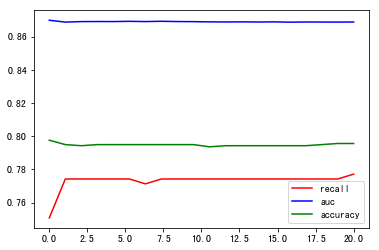

In [192]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)

recall_list = []
auc_list = []
accuracy_list = []

for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",
              C=C,
              cache_size=5000,
              class_weight='balanced').fit(Xtrain,ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,ytest)
    recall = recall_score(ytest,result)
    auc = roc_auc_score(ytest,clf.decision_function(Xtest))
    recall_list.append(recall)
    auc_list.append(auc)
    accuracy_list.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

print(max(auc_list),C_range[auc_list.index(max(auc_list))])

plt.figure()
plt.plot(C_range,recall_list,c='r',label="recall")
plt.plot(C_range,auc_list,c='b',label="auc")
plt.plot(C_range,accuracy_list,c='g',label="accuracy")
plt.legend()
plt.show()

In [193]:
times = time()
clf = SVC(kernel = "linear",
            C=20,
            cache_size=5000,
            class_weight='balanced').fit(Xtrain,ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,ytest)
recall = recall_score(ytest,result)
auc = roc_auc_score(ytest,clf.decision_function(Xtest))
print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under C 20.000000, testing accuracy is 0.795591,recall is 0.777126', auc is 0.868829
00:11:908527


### 画ROC曲线

/usr/local/lib/python3.5/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "right lower". Falling back on "best"; valid locations are
	upper right
	lower right
	best
	upper center
	center left
	center right
	upper left
	right
	lower center
	center
	lower left

  % (loc, '\n\t'.join(self.codes)))


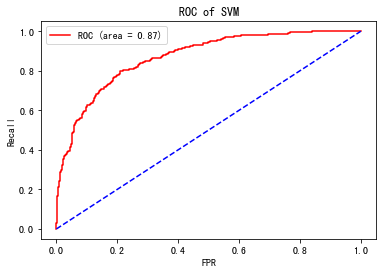

In [195]:
from sklearn.metrics import roc_curve
FPR,Recall,thresholds = roc_curve(ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(ytest,clf.decision_function(Xtest))

plt.figure()
plt.plot(FPR,Recall,color='r',label='ROC (area = %.2f)'%area)
plt.plot([0,1],[0,1],color='b',linestyle="--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.title('ROC of SVM')
plt.legend(loc='right lower')
plt.show()

In [196]:
#求解最佳阈值

maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]


-0.05831250342082628